# **Importing necessary libraries**

In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# **Uploading and processing csv with information about masks**

In [ ]:
df_path='/kaggle/input/airbus-ship-detection/train_ship_segmentations_v2.csv'
df=pd.read_csv(df_path)
display(df)

ImageId                                      EncodedPixels
0       00003e153.jpg                                                NaN
1       0001124c7.jpg                                                NaN
2       000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3       000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
4       000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
...               ...                                                ...
231718  fffedbb6b.jpg                                                NaN
231719  ffff2aa57.jpg                                                NaN
231720  ffff6e525.jpg                                                NaN
231721  ffffc50b4.jpg                                                NaN
231722  ffffe97f3.jpg                                                NaN

[231723 rows x 2 columns]

In [ ]:
df['EncodedPixels'].fillna('0',inplace=True)
display(df)

ImageId                                      EncodedPixels
0       00003e153.jpg                                                  0
1       0001124c7.jpg                                                  0
2       000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3       000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
4       000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
...               ...                                                ...
231718  fffedbb6b.jpg                                                  0
231719  ffff2aa57.jpg                                                  0
231720  ffff6e525.jpg                                                  0
231721  ffffc50b4.jpg                                                  0
231722  ffffe97f3.jpg                                                  0

[231723 rows x 2 columns]

In [ ]:
df=df.groupby(['ImageId'], as_index=False).agg({'EncodedPixels': ' '.join})
display(df)

ImageId                                      EncodedPixels
0       00003e153.jpg                                                  0
1       0001124c7.jpg                                                  0
2       000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3       000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
4       0001b1832.jpg                                                  0
...               ...                                                ...
192551  fffedbb6b.jpg                                                  0
192552  ffff2aa57.jpg                                                  0
192553  ffff6e525.jpg                                                  0
192554  ffffc50b4.jpg                                                  0
192555  ffffe97f3.jpg                                                  0

[192556 rows x 2 columns]

In [ ]:
display(df[df['EncodedPixels']!='0'])

ImageId                                      EncodedPixels
2       000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3       000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
5       00021ddc3.jpg  108287 1 109054 3 109821 4 110588 5 111356 5 1...
6       0002756f7.jpg  255784 2 256552 4 257319 7 258087 9 258854 12 ...
9       00031f145.jpg  340363 1 341129 4 341896 6 342663 7 343429 10 ...
...               ...                                                ...
192524  fff77c602.jpg  133056 1 133823 4 134591 6 135358 8 136126 10 ...
192528  fff909871.jpg  441057 2 441825 4 442592 7 443360 9 444128 11 ...
192543  fffcb6464.jpg  222782 4 223550 10 224318 14 225086 14 225854 ...
192546  fffd924fb.jpg  110011 5 110779 5 111547 5 112315 5 113083 5 1...
192547  fffdd2377.jpg  333603 7 334359 19 335120 26 335888 26 336656 ...

[42556 rows x 2 columns]

# **Saving images and masks into arrays**

In [ ]:
img_size=128
n_images=25000
n_channels=3
no_ships=3000
path='/kaggle/input/airbus-ship-detection/train_v2/'
i=0
if n_channels==3:
    images=np.zeros(shape=(n_images+no_ships,img_size,img_size,n_channels),dtype='uint8')
if n_channels==1:
    images=np.zeros(shape=(n_images+no_ships,img_size,img_size),dtype='uint8')
masks=np.zeros(shape=(n_images+no_ships,img_size,img_size),dtype='uint8')
for image in df[df['EncodedPixels']!='0']['ImageId'].values:
    if i%100==0:
        print(i)
    if n_channels==3:
        img=cv2.imread(path+image)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    elif n_channels==1:
        img=cv2.imread(path+image,0)
    h=img.shape[0]
    w=img.shape[1]
    mask=np.zeros(shape=(h,w))
    pix=df[df['ImageId']==image]['EncodedPixels'].values[0]
    pix=pix.split(' ')
    pix=[int(x) for x in pix]
    for j in range(0,len(pix),2):
        start=pix[j]
        move=pix[j+1]
        start_h=start//h
        start_v=start-1-start_h*h
        for k in range(move):
            if start_v+k<h:
                mask[start_v+k,start_h]=255
            else:
                mask[start_v+k-h,start_h+1]=255
    img=cv2.resize(img,(img_size,img_size))
    images[i]=img
    masks[i]=cv2.resize(mask,(img_size,img_size))
    i+=1
    if i>=n_images:
        break
for image in df[df['EncodedPixels']=='0']['ImageId'].values:
    if i%100==0:
        print(i)
    if n_channels==3:
        img=cv2.imread(path+image)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    elif n_channels==1:
        img=cv2.imread(path+image,0)
    h=img.shape[0]
    w=img.shape[1]
    mask=np.zeros(shape=(h,w))
    img=cv2.resize(img,(img_size,img_size))
    images[i]=img
    masks[i]=cv2.resize(mask,(img_size,img_size))
    i+=1
    if i>=n_images+no_ships:
        break
masks[masks>0]=255
print(images.shape)
print(masks.shape)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

# **Visualizing some images from dataset with their masks**

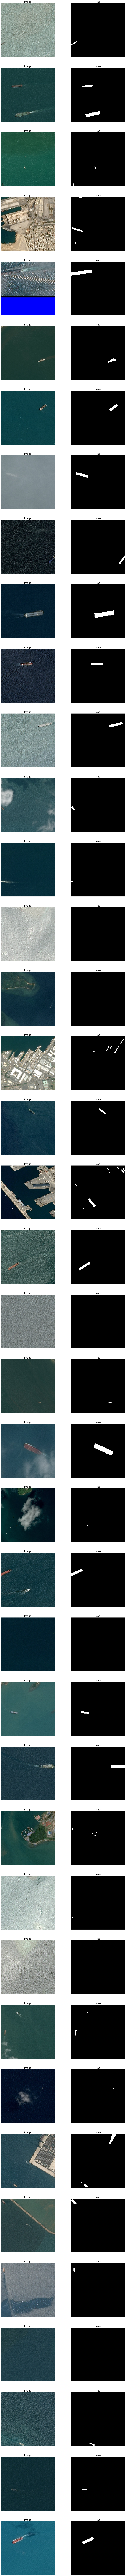

In [ ]:
numb=40
ind=np.random.randint(0,n_images+no_ships,numb)
fig=plt.figure(figsize=(20,10*numb))
for i in range(numb):
    ax=fig.add_subplot(numb,2,2*i+1)
    ax.set_title('Image',fontsize=20)
    ax.axis('off')
    if n_channels==3:
        ax.imshow(images[ind[i]])
    if n_channels==1:
        ax.imshow(images[ind[i]],cmap='gray')
    ax=fig.add_subplot(numb,2,2*i+2)
    ax.set_title('Mask',fontsize=20)
    ax.axis('off')
    ax.imshow(masks[ind[i]],cmap='gray')
plt.show()

# **Discovering ratio of pixels corresponding to ships in our masks**

In [ ]:
masks[masks>0]=1
print(masks.mean())

0.004820491245814732


# **Separating dataseton train,test and validation samples**

In [ ]:
images_train,images_test,masks_train,masks_test=train_test_split(images,masks,train_size=0.8,random_state=1)
images_val,images_test,masks_val,masks_test=train_test_split(images_test,masks_test,test_size=0.5,random_state=1)
print(images_train.shape)
print(masks_train.shape)
print(images_val.shape)
print(masks_val.shape)
print(images_test.shape)
print(masks_test.shape)

(22400, 128, 128, 3)
(22400, 128, 128)
(2800, 128, 128, 3)
(2800, 128, 128)
(2800, 128, 128, 3)
(2800, 128, 128)


# **Applying data augmentation(horizontal and vertical flip)**

In [ ]:
images_train=np.append(images_train,np.array([cv2.flip(image,1) for image in images_train]),axis=0)
masks_train=np.append(masks_train,np.array([cv2.flip(mask,1) for mask in masks_train]),axis=0)
images_train=np.append(images_train,np.array([cv2.flip(image,0) for image in images_train]),axis=0)
masks_train=np.append(masks_train,np.array([cv2.flip(mask,0) for mask in masks_train]),axis=0)

# **Shuffling data**

In [ ]:
images_train,masks_train=shuffle(images_train,masks_train,random_state=1)

# **Converting datasets to format, suitable for usage in TensorFlow**

In [ ]:
BATCH_SIZE=128
images_train=tf.convert_to_tensor(images_train)
print(images_train.shape)
masks_train=tf.convert_to_tensor(masks_train)
print(masks_train.shape)
images_val=tf.convert_to_tensor(images_val)
print(images_val.shape)
masks_val=tf.convert_to_tensor(masks_val)
print(masks_val.shape)
images_test=tf.convert_to_tensor(images_test)
print(images_test.shape)
masks_test=tf.convert_to_tensor(masks_test)
print(masks_val.shape)
train_data=tf.data.Dataset.from_tensor_slices((images_train,masks_train)).batch(BATCH_SIZE)
val_data=tf.data.Dataset.from_tensor_slices((images_val,masks_val)).batch(BATCH_SIZE)
test_data=tf.data.Dataset.from_tensor_slices((images_test,masks_test)).batch(BATCH_SIZE)

(89600, 128, 128, 3)
(89600, 128, 128)
(2800, 128, 128, 3)
(2800, 128, 128)
(2800, 128, 128, 3)
(2800, 128, 128)


# **Defining U-Net's component, and U-Net itself**

In [ ]:
def encoder(In):
    In=tf.keras.layers.BatchNormalization()(In)
    x1=tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(In)
    x1=tf.keras.layers.BatchNormalization()(x1)
    x1=tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x1)
    x1=tf.keras.layers.BatchNormalization()(x1)
    x1=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x1)
    x1=tf.keras.layers.BatchNormalization()(x1)
    x2=tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x1)
    x2=tf.keras.layers.BatchNormalization()(x2)
    x2=tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x2)
    x2=tf.keras.layers.BatchNormalization()(x2)
    x2=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x2)
    x2=tf.keras.layers.BatchNormalization()(x2)
    x3=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x2)
    x3=tf.keras.layers.BatchNormalization()(x3)
    x3=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x3)
    x3=tf.keras.layers.BatchNormalization()(x3)
    x3=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x3)
    x3=tf.keras.layers.BatchNormalization()(x3)
    x4=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x3)
    x4=tf.keras.layers.BatchNormalization()(x4)
    x4=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x4)
    x4=tf.keras.layers.BatchNormalization()(x4)
    x4=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x4)
    x4=tf.keras.layers.BatchNormalization()(x4)
    x5=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x4)
    x5=tf.keras.layers.BatchNormalization()(x5)
    x5=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x5)
    x5=tf.keras.layers.BatchNormalization()(x5)
    x5=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x5)
    x5=tf.keras.layers.BatchNormalization()(x5)
    return x1,x2,x3,x4,x5

In [ ]:
def decoder(In,convs):
  f1,f2,f3,f4,f5=convs
  x=tf.keras.layers.Conv2DTranspose(filters=128,kernel_size=(2,2),strides=(2,2),activation=tf.keras.layers.LeakyReLU(0.1),use_bias=False, padding='valid')(f5)
  x=tf.keras.layers.BatchNormalization()(x)
  f4=tf.keras.layers.Conv2D(filters=128,kernel_size=(1,1),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(f4)
  x=tf.keras.layers.Concatenate(axis=-1)([f4,x])
  x=tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2DTranspose(filters=64,kernel_size=(2,2),strides=(2,2),activation=tf.keras.layers.LeakyReLU(0.1),use_bias=False, padding='valid')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  f3=tf.keras.layers.Conv2D(filters=64,kernel_size=(1,1),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(f3)
  x=tf.keras.layers.Concatenate(axis=-1)([f3,x])
  x=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2DTranspose(filters=32,kernel_size=(2,2),strides=(2,2),activation=tf.keras.layers.LeakyReLU(0.1),use_bias=False, padding='valid')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  f2=tf.keras.layers.Conv2D(filters=32,kernel_size=(1,1),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(f2)
  x=tf.keras.layers.Concatenate(axis=-1)([f2,x])
  x=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2DTranspose(filters=16,kernel_size=(2,2),strides=(2,2),activation=tf.keras.layers.LeakyReLU(0.1),use_bias=False, padding='valid')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  f1=tf.keras.layers.Conv2D(filters=16,kernel_size=(1,1),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(f1)
  x=tf.keras.layers.Concatenate(axis=-1)([f1,x])
  x=tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2DTranspose(filters=8,kernel_size=(2,2),strides=(2,2),activation=tf.keras.layers.LeakyReLU(0.1),use_bias=False, padding='valid')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  In=tf.keras.layers.Conv2D(filters=8,kernel_size=(1,1),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(In)
  In=tf.keras.layers.BatchNormalization()(In)
  x=tf.keras.layers.Concatenate(axis=-1)([In,x])
  x=tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation=tf.keras.layers.LeakyReLU(0.1),padding='same')(x)
  x=tf.keras.layers.BatchNormalization()(x)
  output=tf.keras.layers.Conv2D(filters=1,kernel_size=(1,1),activation='sigmoid')(x)
  return output

In [ ]:
def segmentation_model(img_size):
    In=tf.keras.Input(shape=(img_size,img_size,n_channels))
    convs=encoder(In)
    Out=decoder(In,convs)
    model=tf.keras.Model(inputs=In,outputs=Out,name='Ship_segmentator')
    return model

In [ ]:
model=segmentation_model(img_size)
model.summary()

Model: "Ship_segmentator"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 3)          12        ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         448       ['batch_normalization[0][0]'] 
                                                                                                  
 batch_normalization_1 (Bat  (None, 128, 128, 16)         64        ['conv2d[0][0]'

# **Defining functions for metrics, used for model evaluation**

In [ ]:
def IoU(y_true,y_pred,smooth=1):
    y_true=tf.math.round(y_true)
    y_pred=tf.math.round(y_pred)
    y_true_f=tf.keras.backend.flatten(y_true)
    y_pred_f=tf.keras.backend.flatten(y_pred)
    intersection=tf.keras.backend.sum(y_true_f*y_pred_f)
    dice=(intersection+smooth)/(tf.keras.backend.sum(y_true_f)+tf.keras.backend.sum(y_pred_f)-intersection+smooth)
    return dice

In [ ]:
def Dice(y_true,y_pred,smooth=1):
    y_true=tf.math.round(y_true)
    y_pred=tf.math.round(y_pred)
    y_true_f=tf.keras.backend.flatten(y_true)
    y_pred_f=tf.keras.backend.flatten(y_pred)
    intersection=tf.keras.backend.sum(y_true_f*y_pred_f)
    dice=(2*intersection+smooth)/(tf.keras.backend.sum(y_true_f)+tf.keras.backend.sum(y_pred_f)+smooth)
    return dice

# **Compiling and learning model**

In [ ]:
EPOCHS=100
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=1e-2),loss='binary_crossentropy',metrics=[Dice,IoU])
es=tf.keras.callbacks.EarlyStopping(monitor='val_Dice',min_delta=0,patience=2,restore_best_weights=True,mode='max')
history=model.fit(train_data,validation_data=val_data,epochs=EPOCHS,callbacks=[es])
model.evaluate(test_data)

Epoch 1/100
700/700 [==============================] - 150s 174ms/step - loss: 0.0368 - Dice: 0.5293 - IoU: 0.3772 - val_loss: 0.0088 - val_Dice: 0.6659 - val_IoU: 0.5008
Epoch 2/100
700/700 [==============================] - 120s 172ms/step - loss: 0.0079 - Dice: 0.7014 - IoU: 0.5420 - val_loss: 0.0076 - val_Dice: 0.7142 - val_IoU: 0.5572
Epoch 3/100
700/700 [==============================] - 120s 172ms/step - loss: 0.0067 - Dice: 0.7376 - IoU: 0.5857 - val_loss: 0.0061 - val_Dice: 0.7530 - val_IoU: 0.6056
Epoch 4/100
700/700 [==============================] - 120s 172ms/step - loss: 0.0060 - Dice: 0.7621 - IoU: 0.6168 - val_loss: 0.0055 - val_Dice: 0.7667 - val_IoU: 0.6233
Epoch 5/100
700/700 [==============================] - 120s 171ms/step - loss: 0.0055 - Dice: 0.7792 - IoU: 0.6393 - val_loss: 0.0058 - val_Dice: 0.7409 - val_IoU: 0.5903
Epoch 6/100
700/700 [==============================] - 120s 171ms/step - loss: 0.0051 - Dice: 0.7943 - IoU: 0.6597 - val_loss: 0.0054 - val_Dice:

[0.003995331469923258, 0.8535467386245728, 0.7449758052825928]

# **Visualizing model's perforamnce on a test sample**

In [ ]:
masks_test=masks_test.numpy()

22/22 [==============================] - 1s 43ms/step


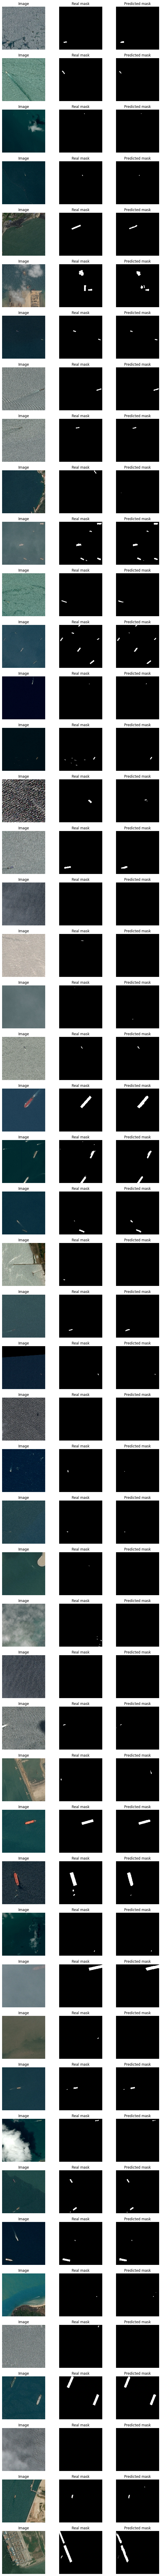

In [ ]:
numb=50
masks_test[masks_test==1]=255
threshold=0.5
masks_pred=1*(model.predict(test_data)>threshold)
masks_pred[masks_pred==1]=255
fig=plt.figure(figsize=(10,10*(numb//3)))
for i in range(numb):
    ax1=fig.add_subplot(numb,3,3*i+1)
    ax1.axis('off')
    ax1.set_title('Image')
    if n_channels==3:
        ax1.imshow(images_test[i])
    elif n_channels==1:
        ax1.imshow(images_test[i],cmap='gray')
    ax2=fig.add_subplot(numb,3,3*i+2)
    ax2.axis('off')
    ax2.set_title('Real mask')
    ax2.imshow(masks_test[i],cmap='gray')
    ax3=fig.add_subplot(numb,3,3*i+3)
    ax3.axis('off')
    ax3.set_title('Predicted mask')
    ax3.imshow(masks_pred[i],cmap='gray')

# **Visualizing model's loss and metrics during learning**

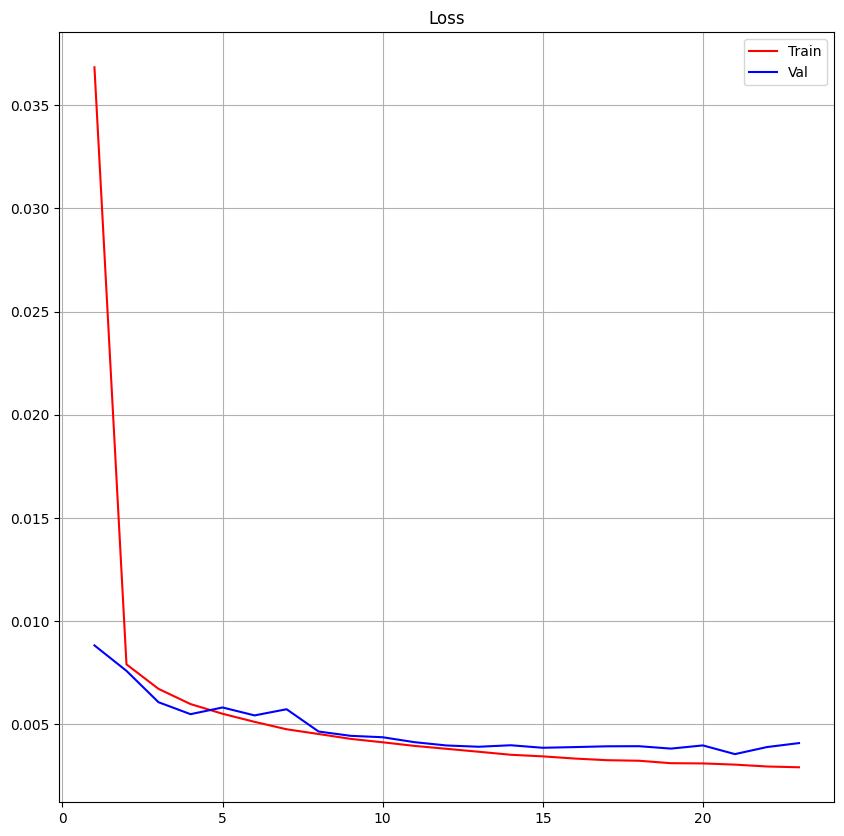

In [ ]:
epochs=[i for i in range(1,len(history.history['loss'])+1)]
loss=history.history['loss']
val_loss=history.history['val_loss']
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.legend()
ax.grid()
plt.show()

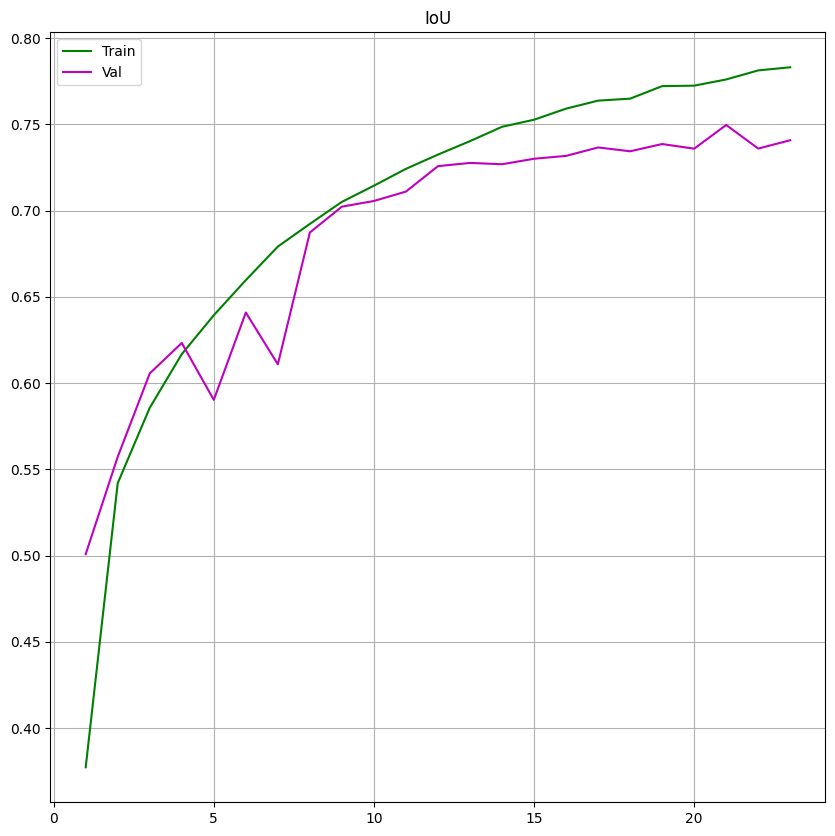

In [ ]:
epochs=[i for i in range(1,len(history.history['IoU'])+1)]
IoU=history.history['IoU']
val_IoU=history.history['val_IoU']
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('IoU')
ax.plot(epochs,IoU,color='g',label='Train')
ax.plot(epochs,val_IoU,color='m',label='Val')
ax.legend()
ax.grid()
plt.show()

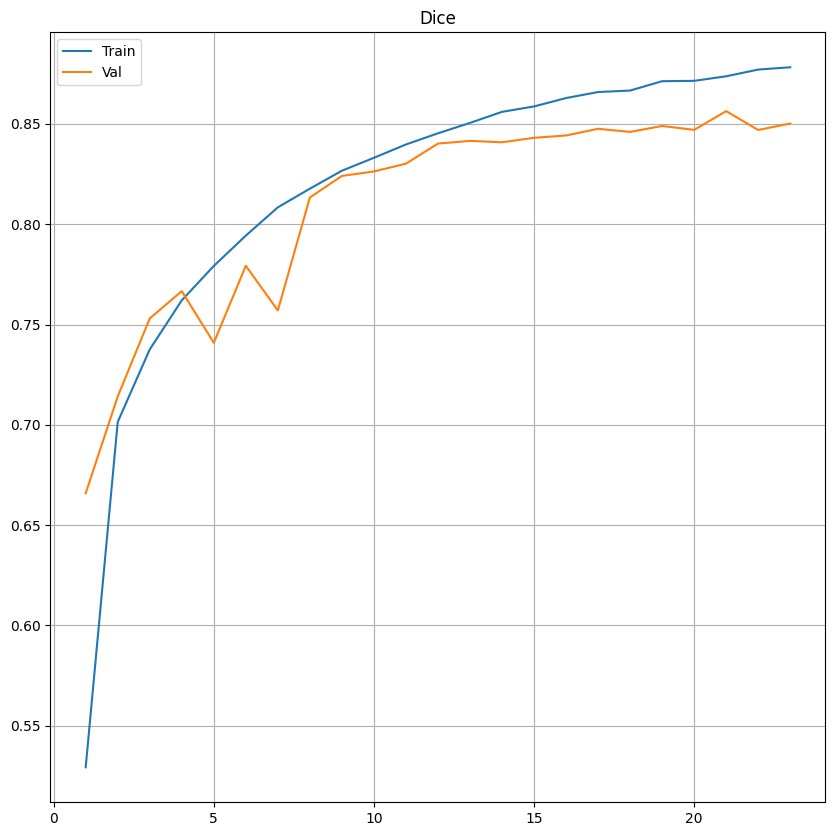

In [ ]:
epochs=[i for i in range(1,len(history.history['Dice'])+1)]
dice=history.history['Dice']
val_dice=history.history['val_Dice']
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('Dice')
ax.plot(epochs,dice,label='Train')
ax.plot(epochs,val_dice,label='Val')
ax.legend()
ax.grid()
plt.show()

# **Saving model**

In [ ]:
model_path='kaggle/working/model.h5'
model.save(model_path)